In [258]:
import random
random.seed = 42
import time
import matplotlib.pyplot as plt

### Quick Sort

In [259]:
def partition_quick_sort(array,low,high):
    pivot=array[high]
    i=low - 1
    for j in range(low,high):
        if(array[j]<= pivot):
            i=i+1
            array[i],array[j]=array[j],array[i]
    array[i+1],array[high]=array[high],array[i+1]
    return i+1

def quick_sort(array,low,high):
    if(low < high):
        pi=partition_quick_sort(array,low,high)
        quick_sort(array,low,pi-1)
        quick_sort(array,pi+1,high)
    return array
    

In [260]:
def quick_sort_call(arr,k):
    start_time = time.time()
    arr = quick_sort(arr,0,len(arr)-1)
    # print("Quick sort : ",arr[:k])
    end_time = time.time()
    return end_time - start_time


### Quick Select

In [261]:

def choose_pivot(arr, low, high):
    return high

def partition_quick_select(arr, low, high):
    pivot_index = choose_pivot(arr, low, high)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[low] = arr[low], arr[pivot_index]
    i = low + 1
    for j in range(low + 1, high + 1):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[low], arr[i - 1] = arr[i - 1], arr[low]
    return i - 1


In [262]:
def kth_smallest_elements(arr, low, high, k):
    if low == high:
        return arr[low]
    else:
        pivot_index = partition_quick_select(arr, low, high)
        if k == pivot_index:
            return arr[pivot_index]
        elif k < pivot_index:
            return kth_smallest_elements(arr, low, pivot_index - 1, k)
        else:
            return kth_smallest_elements(arr, pivot_index + 1, high, k)

In [263]:
def quick_select(arr, k):
    start_time = time.time()
    if k < 1 or k > len(arr):
        return None
    result_arr = []
    for i in range(1,k+1):
        result_arr.append(kth_smallest_elements(arr, 0, len(arr) - 1,i-1))
    end_time = time.time()
    # print("Quick select : ",result_arr)
    return end_time - start_time

### Array Inputs

In [264]:
input_sizes = [20*i for i in range(5,21)]

# print(input_sizes)
time_a = []
time_b = []

for n in input_sizes:
    unsorted_array = [random.randint(1, n) for i in range(n)]
    # print(unsorted_array)
    time_a.append(quick_sort_call(unsorted_array,12))
    time_b.append(quick_select(unsorted_array, 12))  


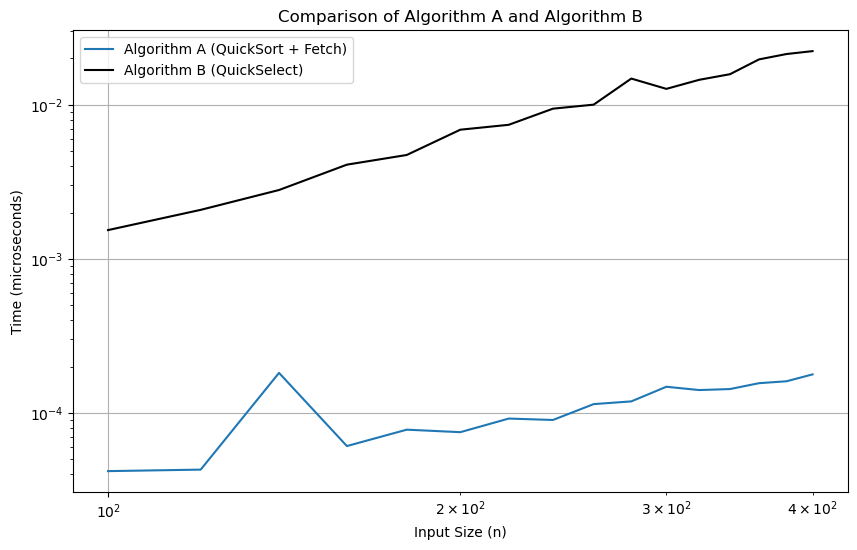

In [265]:

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, time_a, label='Algorithm A (QuickSort + Fetch)')
plt.plot(input_sizes, time_b, label='Algorithm B (QuickSelect)',color='black')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (microseconds)')
plt.yscale('log')
plt.xscale('log')
plt.title('Comparison of Algorithm A and Algorithm B')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def is_reachable(threshold, cities, flights, size):
    # Create a dictionary to represent the graph
    graph = {}
    
    # Create a set to keep track of visited cities
    visited = set()
    
    # Create a function to perform depth-first search (DFS)
    def dfs(city):
        visited.add(city)
        count = 1  # Initialize the component size
        
        if city in graph:
            for neighbor in graph[city]:
                if neighbor not in visited and cities[neighbor - 1] >= threshold:
                    count += dfs(neighbor)
        
        return count
    
    # Build the graph based on flights
    for flight in flights:
        if flight[0] not in graph:
            graph[flight[0]] = []
        graph[flight[0]].append(flight[1])
    
    # Check if there exists a reachable component of size at least 'size'
    for city in cities:
        visited.clear()
        if city >= threshold and dfs(cities.index(city) + 1) >= size:
            return True
    
    return False

def find_max_threshold(cities, flights, size):
    left, right = min(cities), max(cities)
    
    while left < right:
        mid = (left + right + 1) // 2
        
        if is_reachable(mid, cities, flights, size):
            left = mid
        else:
            right = mid - 1
    
    return left

# Input
n, m, s = map(int, input().split())
cities = list(map(int, input().split()))
flights = [list(map(int, input().split())) for _ in range(m)]

# Find and print the maximum threshold value
result = find_max_threshold(cities, flights, s)
print(result)
